<a href="https://colab.research.google.com/github/nhattminh160901/test/blob/main/test/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu==2.0.rc

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0-rc0'

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd/content/drive/MyDrive/vippro

/content/drive/MyDrive/vippro


In [6]:
data = "./"

In [7]:
train_link = data + 'train.p'
valid_link = data + 'valid.p'
test_link = data + 'test.p'

In [8]:
import pickle
with open(train_link, mode='rb') as f:
  train = pickle.load(f)
with open(valid_link, mode='rb') as f:
  valid = pickle.load(f)
with open(test_link, mode='rb') as f:
  test = pickle.load(f)

In [9]:
trainX = train['features']
trainY = train['labels']

In [10]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [11]:
from sklearn.utils import shuffle

In [12]:
trainX, trainY = shuffle(trainX, trainY)

In [13]:
validX = valid['features']
validY = valid['labels']

testX = test['features']
testY = test['labels']

In [14]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)
valid["labels"]

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [16]:
validY[1000]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
width = 32
height = 32
classes = 43

shape = (width, height, 3)

In [20]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))

In [21]:
model.add(Activation('relu'))

In [22]:
model.add(BatchNormalization())

In [23]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=shape))

In [24]:
model.add(Activation('relu'))

In [25]:
model.add(BatchNormalization())

In [26]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
model.add(Conv2D(64, (3, 3), padding='same'))

In [28]:
model.add(Activation('relu'))

In [29]:
model.add(BatchNormalization())

In [30]:
model.add(Conv2D(64, (3, 3), padding='same'))

In [31]:
model.add(Activation('relu'))

In [32]:
model.add(BatchNormalization())

In [33]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(512))

In [36]:
model.add(Activation('relu'))

In [37]:
model.add(BatchNormalization())

In [38]:
model.add(Dense(classes))

In [39]:
model.add(Activation('softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [41]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [42]:
learning_rate = 0.01

In [43]:
epochs = 10

In [44]:
batch_size = 64

In [45]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [46]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
  2/543 [..............................] - ETA: 7:56 - loss: 4.7578 - accuracy: 0.0078     

KeyboardInterrupt: ignored

Training 10/10 -> save

In [48]:
model.save("test.h5")

In [49]:
pip install h5py==2.10.0

In [50]:
saved_model = tf.keras.models.load_model("vippro.h5")

In [62]:
result = saved_model.predict(testX[3031:3032])

In [63]:
result

array([[8.3192511e-09, 9.9999881e-01, 3.1664339e-07, 2.4660047e-09,
        4.4228867e-07, 6.0658103e-08, 1.2869669e-10, 1.9136120e-07,
        5.3813025e-08, 9.0758878e-10, 2.3911470e-12, 7.7141459e-14,
        1.5399760e-12, 1.2731408e-10, 2.5133318e-10, 2.5573104e-11,
        3.4946540e-12, 1.1938563e-13, 5.0362865e-12, 5.0352014e-12,
        4.5548699e-13, 2.6465980e-11, 3.5267197e-13, 1.7626589e-10,
        1.6906015e-11, 1.7990129e-13, 4.2082261e-11, 1.0822134e-12,
        8.5212974e-09, 5.0564275e-10, 1.5262567e-11, 1.7326498e-13,
        1.3010065e-12, 4.6862996e-13, 1.5919618e-14, 2.8079146e-09,
        2.5046223e-10, 3.4902078e-10, 2.1843578e-10, 8.7185779e-14,
        3.8213120e-08, 8.9808190e-13, 4.5806806e-11]], dtype=float32)

In [64]:
final = np.argmax(result)
final = classNames[final]
final

'Speed limit (30km/h)'

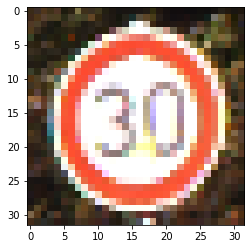

In [61]:
plt.imshow(test["features"][3031])